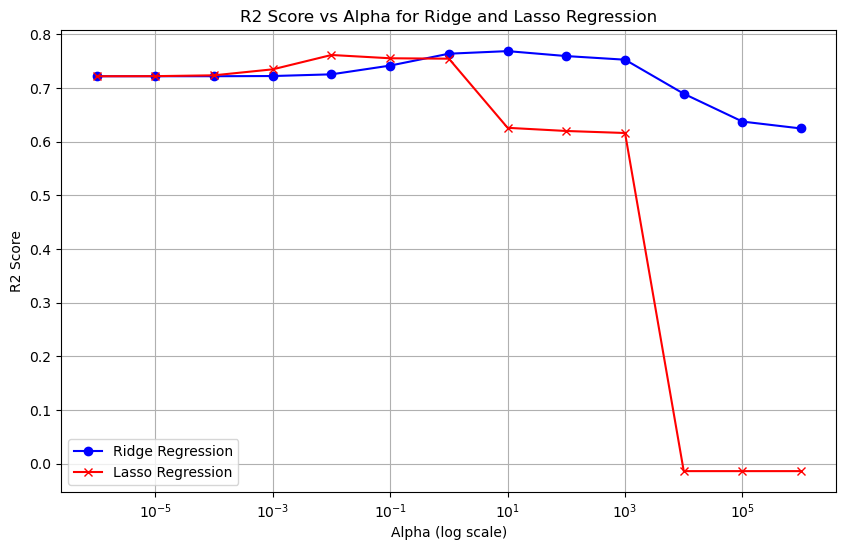

Best alpha for Ridge Regression: 10.0
Best alpha for Lasso Regression: 0.01


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# a) Read the data into pandas dataframe
df = pd.read_csv('Auto.csv')

df = df.dropna()

# b) Setup multiple regression X and y
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df['mpg']


X = pd.get_dummies(X, drop_first=True)

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement both ridge regression and LASSO regression using several values for alpha
alphas = np.logspace(-6, 6, 13)

ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    ridge_scores.append(r2_score(y_test, y_pred_ridge))
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_scores.append(r2_score(y_test, y_pred_lasso))

"""
Both Ridge and Lasso regression models are fitted for several values of alpha, and the R2 scores are calculated for each.
"""


# f) Plot the R2 scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_scores, label='Ridge Regression', color='blue', marker='o')

plt.plot(alphas, lasso_scores, label='Lasso Regression', color='red', marker='x')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha for Ridge and Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

"""
The R2 scores for both models are plotted against alpha (on a log scale), which helps visualize how the performance varies with regularization strength.
"""

# g) Identify the value for alpha which gives the best score
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]

print(f"Best alpha for Ridge Regression: {best_ridge_alpha}")
print(f"Best alpha for Lasso Regression: {best_lasso_alpha}")
